In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
train = pd.read_csv("Train.csv")

In [ ]:
test = pd.read_csv("Test.csv")

In [ ]:
train.head(10)

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2019-12-30,0,1,0,455.201
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,2019-09-10,0,0,0,1164.877
5,b4ae55a4553d43697dcf64b66033677b,550,Product/160402 Android/5.0 Device/LGE_LG-D855 ...,Android Phone - Android,2020-02-06,0,1,0,6010.343
6,a17491477ea11e951286f583b3095899,198,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:30.0) G...,Desktop - Firefox,2019-05-30,1,1,1,8471.435
7,939dfd89beacc36f5f8acd5bfa062b57,2915,Mozilla/5.0 (Windows NT 6.3; WOW64; Trident/7....,Android Tablet - Web,2020-01-03,0,0,0,83.030
8,1334aaff26b65ec26dc1e539c0ed20cb,319,Product/4.5.1 iPhone/8.1,iPhone - iOS,2019-10-19,0,0,0,97.722
9,750d0bfd2fb9ba1628586bb98c1611ca,2574,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-03-04,0,1,0,44.841


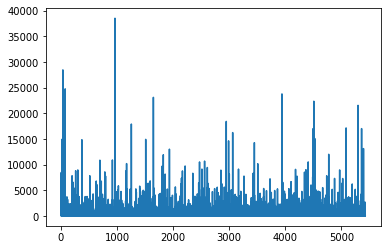

In [ ]:
train['time_spent'].plot(sort_columns=True)

In [ ]:
train['session_number'].value_counts()

11      437
22      192
33      132
44      101
55       93
       ... 
3949      1
3696      1
5962      1
7601      1
6083      1
Name: session_number, Length: 610, dtype: int64

In [ ]:
train['counts'] = train['session_number'].map(train['session_number'].value_counts())

In [ ]:
train[(train.counts >50) & (train.counts <= 100) ].count()

session_id        929
session_number    929
client_agent      883
device_details    929
date              929
purchased         929
added_in_cart     929
checked_out       929
time_spent        929
counts            929
dtype: int64

In [ ]:
train.loc[(train['counts'] >=0) & (train['counts'] <= 10), 'counts'] = 1
train.loc[(train['counts'] >10) & (train['counts'] <= 20), 'counts'] = 2
train.loc[(train['counts'] >20) & (train['counts'] <= 50), 'counts'] = 3
train.loc[(train['counts'] >50) & (train['counts'] <= 200), 'counts'] = 4
train.loc[train['counts'] >200, 'counts'] = 5

In [ ]:
train = train.drop('session_number', axis=1)

In [ ]:
train = train.drop(train[train.time_spent > 10000].index)

In [ ]:
train.time_spent = np.log(train.time_spent)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


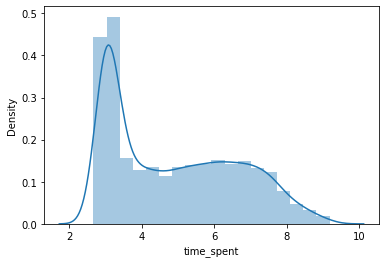

In [ ]:
sns.distplot(train.time_spent)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


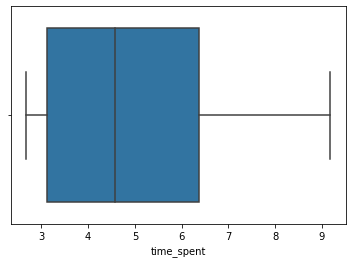

In [ ]:
sns.boxplot(train.time_spent)

In [ ]:
train.dtypes

session_id         object
client_agent       object
device_details     object
date               object
purchased           int64
added_in_cart       int64
checked_out         int64
time_spent        float64
counts              int64
dtype: object

In [ ]:
from datetime import datetime
train['Year'] = pd.to_datetime(train['date']).dt.year
train['Month'] = pd.to_datetime(train['date']).dt.month
train['Date'] = pd.to_datetime(train['date']).dt.day
train['dayofWeek'] = pd.to_datetime(train['date']).dt.day_name()
train['dayofWeek'] = train['dayofWeek'].map({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,
                                           'Friday':5, 'Saturday':6,'Sunday':7})

In [ ]:
train = train.drop("date",axis = 1)

In [ ]:
train.head()

,session_id,client_agent,device_details,purchased,added_in_cart,checked_out,time_spent,counts,Year,Month,Date,dayofWeek
0,57f879e70d3c5fc2a98102d64c9fd84e,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,1,0,0,5.467579,3,2020,1,22,3
1,a5442b0c7c33d0a811e7661e556b2de8,Product/8.0 iPhone/8.1.3,iPhone - iOS,1,0,0,7.152625,4,2020,2,27,4
2,305cb1486ed8610c00b37007926cb2c4,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,0,0,0,3.077497,5,2019,8,1,4
3,f2c1ecc9993f0071df91ba178450498c,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,0,1,0,6.120739,1,2019,12,30,1
4,e460830ae295e55d2216ebdc761ab9a6,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,0,0,0,7.060371,1,2019,9,10,2


In [ ]:
train.isna().sum()

session_id          0
client_agent      160
device_details      0
purchased           0
added_in_cart       0
checked_out         0
time_spent          0
counts              0
Year                0
Month               0
Date                0
dayofWeek           0
dtype: int64

In [ ]:
train.shape

(5398, 12)

In [ ]:
train.isna().sum()

session_id          0
client_agent      160
device_details      0
purchased           0
added_in_cart       0
checked_out         0
time_spent          0
counts              0
Year                0
Month               0
Date                0
dayofWeek           0
dtype: int64

In [ ]:
train.shape

(5398, 12)

In [ ]:
train.time_spent.max()

9.18337618381048

In [ ]:
train.time_spent.min()

2.667228206581955

In [ ]:
train.Year.value_counts()

2019    3946
2020    1452
Name: Year, dtype: int64

In [ ]:
train['device_details'].value_counts()

iPhone - iOS                  1501
Desktop - Chrome               814
iPhone - Web                   656
Android Phone - Android        324
Desktop - Safari               312
Desktop - IE                   292
iPad - Web                     287
iPhone - MobileWeb             275
Desktop - Firefox              234
Android Tablet - Web           203
Other - Other                  185
Unknown - MobileWeb             87
Android Phone - Web             86
iPad - iOS                      77
Android Phone - MobileWeb       54
Android Tablet - Android         9
Android Tablet - MobileWeb       2
Name: device_details, dtype: int64

In [ ]:
#train['device_details'] = train['device_details'].str.split(' - ').str[1] 

In [ ]:
train.device_details.value_counts()

iPhone - iOS                  1501
Desktop - Chrome               814
iPhone - Web                   656
Android Phone - Android        324
Desktop - Safari               312
Desktop - IE                   292
iPad - Web                     287
iPhone - MobileWeb             275
Desktop - Firefox              234
Android Tablet - Web           203
Other - Other                  185
Unknown - MobileWeb             87
Android Phone - Web             86
iPad - iOS                      77
Android Phone - MobileWeb       54
Android Tablet - Android         9
Android Tablet - MobileWeb       2
Name: device_details, dtype: int64

In [ ]:
train.device_details[train.loc[:,"device_details"] == "iPhone - iOS"] = "iPhone_m"
train.device_details[train.loc[:,"device_details"] == "Desktop - Chrome"] = "web"
train.device_details[train.loc[:,"device_details"] == "iPhone - Web"] = "iPhone_w"
train.device_details[train.loc[:,"device_details"] == "Android Phone - Android"] = "android_m"
train.device_details[train.loc[:,"device_details"] == "Desktop - Safari"] = "web"
train.device_details[train.loc[:,"device_details"] == "Desktop - IE"] = "web"
train.device_details[train.loc[:,"device_details"] == "iPad - Web"] = "ipadweb"
train.device_details[train.loc[:,"device_details"] == "iPhone - MobileWeb"] = "iPhone_w"
train.device_details[train.loc[:,"device_details"] == "Desktop - Firefox"] = "web"
train.device_details[train.loc[:,"device_details"] == "Android Tablet - Web"] = "android_w"
train.device_details[train.loc[:,"device_details"] == "Other - Other"] = "Other"
train.device_details[train.loc[:,"device_details"] == "Unknown - MobileWeb"] = "otherweb"
train.device_details[train.loc[:,"device_details"] == "Android Phone - Web"] = "android_w"
train.device_details[train.loc[:,"device_details"] == "iPad - iOS"] = "ipad"
train.device_details[train.loc[:,"device_details"] == "Android Phone - MobileWeb"] = "android_w"
train.device_details[train.loc[:,"device_details"] == "Android Tablet - Android"] = "tablet_m"
train.device_details[train.loc[:,"device_details"] == "Android Tablet - MobileWeb"] = "tablet_w"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [ ]:
train.device_details.value_counts()

web          1652
iPhone_m     1501
iPhone_w      931
android_w     343
android_m     324
ipadweb       287
Other         185
otherweb       87
ipad           77
tablet_m        9
tablet_w        2
Name: device_details, dtype: int64

In [ ]:
train.device_details[train.device_details == 'Other']

19      Other
55      Other
92      Other
108     Other
120     Other
        ...  
5269    Other
5280    Other
5333    Other
5341    Other
5354    Other
Name: device_details, Length: 185, dtype: object

In [ ]:
train.loc[92]

session_id                       60b10dc38cf71373c0215a4158680616
client_agent      Typhoeus - https://github.com/typhoeus/typhoeus
device_details                                              Other
purchased                                                       0
added_in_cart                                                   0
checked_out                                                     0
time_spent                                                4.94139
counts                                                          2
Year                                                         2019
Month                                                           9
Date                                                            3
dayofWeek                                                       2
Name: 92, dtype: object

In [ ]:
train[train.client_agent == 'Typhoeus - https://github.com/typhoeus/typhoeus'] = 2

In [ ]:
train.shape

(5398, 12)

In [ ]:
train[train.client_agent == '-unknown-'] = 2

In [ ]:
train[train.client_agent == 'Product/4.1.1 CFNetwork/672.0.2 Darwin/14.0.0'].index

Int64Index([1486, 2385, 3541, 4304, 4469, 4549, 4819], dtype='int64')

In [ ]:
train.device_details[train.loc[:,"client_agent"] == "Product/4.1.1 CFNetwork/672.0.2 Darwin/14.0.0"] = "android_m"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train.device_details[train.loc[:,"client_agent"] == "Product/4.4.1 CFNetwork/711.1.12 Darwin/14.0.0"] = "android_m"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train.device_details[train.loc[:,"client_agent"] == "Opera/9.80 (Macintosh; Intel Mac OS X 10.7.5) Presto/2.12.388 Version/12.16"] = "web"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train.device_details[train.loc[:,"client_agent"] == "Product/4.4.1 CFNetwork/711.0.6 Darwin/14.0.0"] = "android_m"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train.device_details[train.loc[:,"client_agent"] == "Product/3.0.1 CFNetwork/672.0.8 Darwin/14.0.0"] = "android_m"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train.device_details[train.loc[:,"client_agent"] == "Opera/9.80 (Macintosh; Intel Mac OS X 10.7.5) Presto/2.12.388 Version/12.16"] = "web"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train['device_details'].value_counts()

web          1658
iPhone_m     1501
iPhone_w      931
android_w     343
android_m     337
ipadweb       287
Other         134
otherweb       87
ipad           77
2              32
tablet_m        9
tablet_w        2
Name: device_details, dtype: int64

In [ ]:
for i, row in train.iterrows():
    if row['device_details'] == 'Other':
        if type(row['client_agent']) is str and 'Android' or 'Darwin' or 'iPhone' or 'iPad' in row['client_agent']:
                train.loc[i, 'device_details'] = "android_m"
        elif type(row['client_agent']) is str and 'Windows' or 'Macintosh' in row['client_agent']:
             train.loc[i, 'device_details'] = "web"
        else:
            train.loc[i, 'device_details'] = 2
        

In [ ]:
conditions=[(train["purchased"]==0) & (train["added_in_cart"]==0) & (train["checked_out"]==0),
    (train["purchased"]==0) & (train["added_in_cart"]==0) & (train["checked_out"]==1),
    (train["purchased"]==0) & (train["added_in_cart"]==1) & (train["checked_out"]==0),
    (train["purchased"]==0) & (train["added_in_cart"]==1) & (train["checked_out"]==1),
    (train["purchased"]==1) & (train["added_in_cart"]==0) & (train["checked_out"]==0),
    (train["purchased"]==1) & (train["added_in_cart"]==0) & (train["checked_out"]==1),
    (train["purchased"]==1) & (train["added_in_cart"]==1) & (train["checked_out"]==0),
    (train["purchased"]==1) & (train["added_in_cart"]==1) & (train["checked_out"]==1)]

values = ['no_activity','chk','add','add_chk','purc','purc_chk','purc_add','purc_add_chk']
train['customer_activity'] = np.select(conditions, values)

In [ ]:
train['device_details'].value_counts()

web          1658
iPhone_m     1501
iPhone_w      931
android_m     471
android_w     343
ipadweb       287
otherweb       87
ipad           77
2              32
tablet_m        9
tablet_w        2
Name: device_details, dtype: int64

In [ ]:
train.drop("session_id", axis = 1,inplace = True)

In [ ]:
train.time_spent

0       5.467579
1       7.152625
2       3.077497
3       6.120739
4       7.060371
          ...   
5424    3.025340
5425    7.338021
5426    3.122849
5427    3.037066
5428    3.020620
Name: time_spent, Length: 5398, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


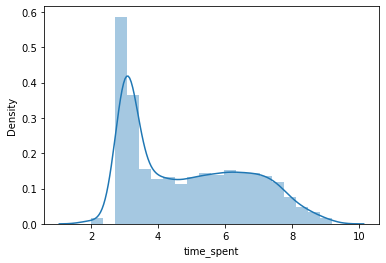

In [ ]:
sns.distplot(train.time_spent)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


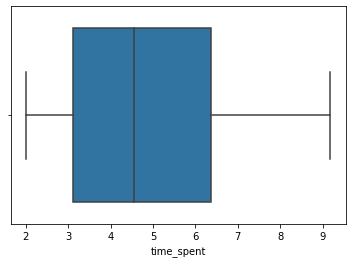

In [ ]:
sns.boxplot(train.time_spent)

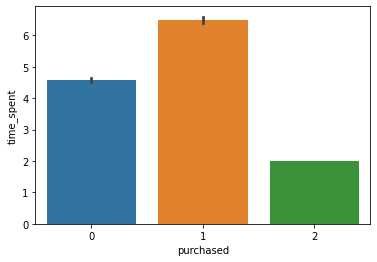

In [ ]:
sns.barplot(x = train.purchased, y = train.time_spent)

In [ ]:
train.head()

,client_agent,device_details,purchased,added_in_cart,checked_out,time_spent,counts,Year,Month,Date,dayofWeek,customer_activity
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,web,1,0,0,5.467579,3,2020,1,22,3,purc
1,Product/8.0 iPhone/8.1.3,iPhone_m,1,0,0,7.152625,4,2020,2,27,4,purc
2,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone_w,0,0,0,3.077497,5,2019,8,1,4,no_activity
3,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,web,0,1,0,6.120739,1,2019,12,30,1,add
4,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone_w,0,0,0,7.060371,1,2019,9,10,2,no_activity


In [ ]:
train.isna().sum()

client_agent         160
device_details         0
purchased              0
added_in_cart          0
checked_out            0
time_spent             0
counts                 0
Year                   0
Month                  0
Date                   0
dayofWeek              0
customer_activity      0
dtype: int64

In [ ]:
test.session_number.value_counts()

11      193
22       72
33       62
44       59
55       43
       ... 
2035      1
6138      1
6116      1
4059      1
6149      1
Name: session_number, Length: 453, dtype: int64

In [ ]:
train.shape

(5398, 12)

In [ ]:
train[train == ' '].sum()

client_agent         0.0
device_details       0.0
purchased            0.0
added_in_cart        0.0
checked_out          0.0
time_spent           0.0
counts               0.0
Year                 0.0
Month                0.0
Date                 0.0
dayofWeek            0.0
customer_activity    0.0
dtype: float64

In [ ]:
train.drop(["Date","dayofWeek"], axis = 1,inplace = True)

In [ ]:
train.drop(["client_agent"], axis = 1,inplace = True)

In [ ]:
train

,device_details,purchased,added_in_cart,checked_out,time_spent,counts,Year,Month,customer_activity
0,web,1,0,0,5.467579,3,2020,1,purc
1,iPhone_m,1,0,0,7.152625,4,2020,2,purc
2,iPhone_w,0,0,0,3.077497,5,2019,8,no_activity
3,web,0,1,0,6.120739,1,2019,12,add
4,iPhone_w,0,0,0,7.060371,1,2019,9,no_activity
...,...,...,...,...,...,...,...,...,...
5424,iPhone_w,0,0,0,3.025340,2,2019,11,no_activity
5425,iPhone_m,0,0,0,7.338021,1,2019,9,no_activity
5426,web,0,0,0,3.122849,4,2019,8,no_activity
5427,otherweb,0,0,0,3.037066,3,2019,6,no_activity


In [ ]:
device_details = pd.get_dummies(train['device_details'],drop_first=True)

In [ ]:
device_details

,android_m,android_w,iPhone_m,iPhone_w,ipad,ipadweb,otherweb,tablet_m,tablet_w,web
0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5424,0,0,0,1,0,0,0,0,0,0
5425,0,0,1,0,0,0,0,0,0,0
5426,0,0,0,0,0,0,0,0,0,1
5427,0,0,0,0,0,0,1,0,0,0


In [ ]:
Year = pd.get_dummies(train['Year'],drop_first=True)

In [ ]:
train.Month[train.loc[:,"Month"] == 1] = "qtr1"
train.Month[train.loc[:,"Month"] == 2] = "qtr1"
train.Month[train.loc[:,"Month"] == 3] = "qtr1"
train.Month[train.loc[:,"Month"] == 4] = "qtr2"
train.Month[train.loc[:,"Month"] == 5] = "qtr2"
train.Month[train.loc[:,"Month"] == 6] = "qtr2"
train.Month[train.loc[:,"Month"] == 7] = "qtr3"
train.Month[train.loc[:,"Month"] == 8] = "qtr3"
train.Month[train.loc[:,"Month"] == 9] = "qtr3"
train.Month[train.loc[:,"Month"] == 10] = "qtr4"
train.Month[train.loc[:,"Month"] == 11] = "qtr4"
train.Month[train.loc[:,"Month"] == 12] = "qtr4"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Month = pd.get_dummies(train['Month'],drop_first=True)

In [ ]:
Year

,2019,2020
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
5424,1,0
5425,1,0
5426,1,0
5427,1,0


In [ ]:
train.drop(["device_details","Year","Month"], axis = 1,inplace = True)

In [ ]:
train.checked_out.value_counts()

0    5274
1      92
2      32
Name: checked_out, dtype: int64

In [ ]:
train = pd.concat([train,device_details,Year,Month], axis=1)

In [ ]:
train.drop(["purchased","added_in_cart","checked_out"], axis = 1,inplace = True)

In [ ]:
train = pd.get_dummies(train, columns=['customer_activity'])

In [ ]:
train = pd.get_dummies(train, columns=['counts'])

In [ ]:
train.drop("counts_1",axis =1, inplace = True)

In [ ]:
train.drop(["customer_activity_0"], axis = 1,inplace = True)

In [ ]:
train

,time_spent,android_m,android_w,iPhone_m,iPhone_w,ipad,ipadweb,otherweb,tablet_m,tablet_w,web,2019,2020,qtr2,qtr3,qtr4,customer_activity_add,customer_activity_add_chk,customer_activity_chk,customer_activity_no_activity,customer_activity_purc,customer_activity_purc_add,customer_activity_purc_add_chk,customer_activity_purc_chk,counts_2,counts_3,counts_4,counts_5
0,5.467579,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,7.152625,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,3.077497,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
3,6.120739,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
4,7.060371,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5424,3.025340,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
5425,7.338021,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
5426,3.122849,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
5427,3.037066,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0


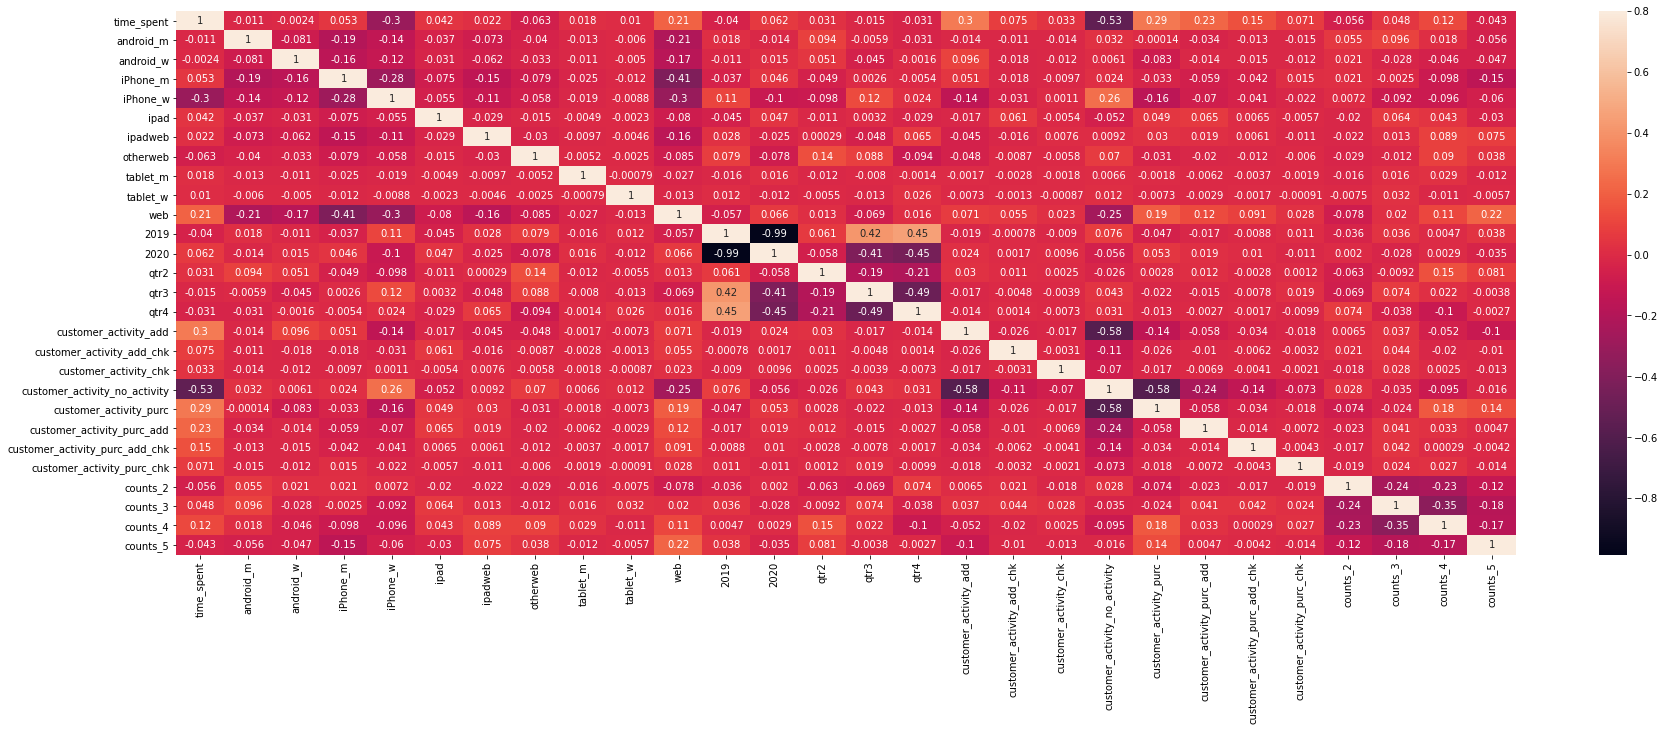

In [ ]:
corr_matrix = train.corr()
f , ax = plt.subplots(figsize=(30,10))
sns.heatmap(corr_matrix,vmax=0.8, annot=True)

In [ ]:
test.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out
0,0bf72b05b2cf70dc5e28c3c09f9c4f97,99,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,Desktop - IE,2020-01-07,1,0,0
1,6bc696d99954e4f1367e845465186aef,935,Product/160393 Android/4.3 Device/samsung_GT-I...,Android Phone - Android,2020-02-13,0,0,0
2,3d8611a5ea0f621d205b67f09f663a89,902,Product/4.2.2 iPhone/7.1.2,iPhone - iOS,2019-10-14,1,0,0
3,a0351545c032fd0da36289410c6c3354,3223,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2020-01-26,0,0,0
4,dd8999772b0ab27225fb05e5df2f1da6,231,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-29,0,0,0


In [ ]:
test['session_number'].value_counts()

11      193
22       72
33       62
44       59
55       43
       ... 
2035      1
6138      1
6116      1
4059      1
6149      1
Name: session_number, Length: 453, dtype: int64

In [ ]:
len(test)

2327

In [ ]:
test['Year'] = pd.to_datetime(test['date']).dt.year
test['Month'] = pd.to_datetime(test['date']).dt.month
test['Date'] = pd.to_datetime(test['date']).dt.day
test['dayofWeek'] = pd.to_datetime(test['date']).dt.day_name()
test['dayofWeek'] = test['dayofWeek'].map({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,
                                           'Friday':5, 'Saturday':6,'Sunday':7})
test = test.drop("date",axis = 1)

In [ ]:
#test['device_details'] = test['device_details'].str.split(' - ').str[1] 

In [ ]:
test.device_details.value_counts()

iPhone - iOS                 615
Desktop - Chrome             366
iPhone - Web                 279
iPhone - MobileWeb           152
Desktop - IE                 137
Desktop - Safari             130
Android Phone - Android      125
iPad - Web                   124
Android Tablet - Web          96
Desktop - Firefox             93
Other - Other                 82
iPad - iOS                    44
Unknown - MobileWeb           35
Android Phone - Web           26
Android Phone - MobileWeb     18
Android Tablet - Android       5
Name: device_details, dtype: int64

In [ ]:
test.device_details[test.loc[:,"device_details"] == "iPhone - iOS"] = "iPhone_m"
test.device_details[test.loc[:,"device_details"] == "Desktop - Chrome"] = "web"
test.device_details[test.loc[:,"device_details"] == "iPhone - Web"] = "iPhone_w"
test.device_details[test.loc[:,"device_details"] == "Android Phone - Android"] = "android_m"
test.device_details[test.loc[:,"device_details"] == "Desktop - Safari"] = "web"
test.device_details[test.loc[:,"device_details"] == "Desktop - IE"] = "web"
test.device_details[test.loc[:,"device_details"] == "iPad - Web"] = "ipadweb"
test.device_details[test.loc[:,"device_details"] == "iPhone - MobileWeb"] = "iPhone_w"
test.device_details[test.loc[:,"device_details"] == "Desktop - Firefox"] = "web"
test.device_details[test.loc[:,"device_details"] == "Android Tablet - Web"] = "android_w"
test.device_details[test.loc[:,"device_details"] == "Other - Other"] = "Other"
test.device_details[test.loc[:,"device_details"] == "Unknown - MobileWeb"] = "otherweb"
test.device_details[test.loc[:,"device_details"] == "Android Phone - Web"] = "android_w"
test.device_details[test.loc[:,"device_details"] == "iPad - iOS"] = "ipad"
test.device_details[test.loc[:,"device_details"] == "Android Phone - MobileWeb"] = "android_w"
test.device_details[test.loc[:,"device_details"] == "Android Tablet - Android"] = "tablet_m"
test.device_details[test.loc[:,"device_details"] == "Android Tablet - MobileWeb"] = "tablet_w"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [ ]:
test.isna().sum()

session_id         0
session_number     0
client_agent      59
device_details     0
purchased          0
added_in_cart      0
checked_out        0
Year               0
Month              0
Date               0
dayofWeek          0
dtype: int64

In [ ]:
test.shape

(2327, 11)

In [ ]:
test.drop("session_id", axis = 1,inplace = True)

In [ ]:
test[test.client_agent == 'Typhoeus - https://github.com/typhoeus/typhoeus'] = 2

In [ ]:
test[test.client_agent == '-unknown-'] = 2

In [ ]:
for i, row in test.iterrows():
    if row['device_details'] == 'Other':
        if type(row['client_agent']) is str and 'Android' or 'Darwin' or 'iPhone' or 'iPad' in row['client_agent']:
                test.loc[i, 'device_details'] = "android_m"
        elif type(row['client_agent']) is str and 'Windows' or 'Macintosh' in row['client_agent']:
             test.loc[i, 'device_details'] = "web"
        else:
            test.loc[i, 'device_details'] = 2

In [ ]:
test.device_details.value_counts()

web          726
iPhone_m     615
iPhone_w     431
android_m    188
android_w    140
ipadweb      124
ipad          44
otherweb      35
2             19
tablet_m       5
Name: device_details, dtype: int64

In [ ]:
test.drop(["client_agent"], axis = 1,inplace = True)

In [ ]:
test.drop(["Date","dayofWeek"], axis = 1,inplace = True)

In [ ]:
device_details = pd.get_dummies(test['device_details'],drop_first=True)

In [ ]:
Year = pd.get_dummies(test['Year'],drop_first=True)

In [ ]:
test.Month[test.loc[:,"Month"] == 1] = "qtr1"
test.Month[test.loc[:,"Month"] == 2] = "qtr1"
test.Month[test.loc[:,"Month"] == 3] = "qtr1"
test.Month[test.loc[:,"Month"] == 4] = "qtr2"
test.Month[test.loc[:,"Month"] == 5] = "qtr2"
test.Month[test.loc[:,"Month"] == 6] = "qtr2"
test.Month[test.loc[:,"Month"] == 7] = "qtr3"
test.Month[test.loc[:,"Month"] == 8] = "qtr3"
test.Month[test.loc[:,"Month"] == 9] = "qtr3"
test.Month[test.loc[:,"Month"] == 10] = "qtr4"
test.Month[test.loc[:,"Month"] == 11] = "qtr4"
test.Month[test.loc[:,"Month"] == 12] = "qtr4"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Month = pd.get_dummies(test['Month'],drop_first=True)

In [ ]:
test.drop(["device_details","Year","Month"], axis = 1,inplace = True)

In [ ]:
test = pd.concat([test,device_details,Year,Month], axis=1)

In [ ]:
conditions=[(test["purchased"]==0) & (test["added_in_cart"]==0) & (test["checked_out"]==0),
    (test["purchased"]==0) & (test["added_in_cart"]==0) & (test["checked_out"]==1),
    (test["purchased"]==0) & (test["added_in_cart"]==1) & (test["checked_out"]==0),
    (test["purchased"]==0) & (test["added_in_cart"]==1) & (test["checked_out"]==1),
    (test["purchased"]==1) & (test["added_in_cart"]==0) & (test["checked_out"]==0),
    (test["purchased"]==1) & (test["added_in_cart"]==0) & (test["checked_out"]==1),
    (test["purchased"]==1) & (test["added_in_cart"]==1) & (test["checked_out"]==0),
    (test["purchased"]==1) & (test["added_in_cart"]==1) & (test["checked_out"]==1)]

values = ['no_activity','chk','add','add_chk','purc','purc_chk','purc_add','purc_add_chk']
test['customer_activity'] = np.select(conditions, values)

In [ ]:
test = pd.get_dummies(test, columns=['customer_activity'])

In [ ]:
test.drop(["customer_activity_0"], axis = 1,inplace = True)

In [ ]:
test['counts'] = test['session_number'].map(test['session_number'].value_counts())

In [ ]:
test.loc[test.counts]

,session_number,purchased,added_in_cart,checked_out,android_m,android_w,iPhone_m,iPhone_w,ipad,ipadweb,otherweb,tablet_m,web,2019,2020,qtr2,qtr3,qtr4,customer_activity_add,customer_activity_add_chk,customer_activity_chk,customer_activity_no_activity,customer_activity_purc,customer_activity_purc_add,customer_activity_purc_add_chk,customer_activity_purc_chk,counts
33,495,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,9
6,847,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,6
10,1628,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,6
1,935,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,6
15,319,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,231,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,15
3,3223,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,935,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,6
13,187,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,23


In [ ]:
test['session_number'].value_counts()

11      193
22       72
33       62
44       59
55       43
       ... 
7227      1
3113      1
2904      1
3091      1
4092      1
Name: session_number, Length: 454, dtype: int64

In [ ]:
test.loc[(test['counts'] >=0) & (test['counts'] <= 10), 'counts'] = 1
test.loc[(test['counts'] >10) & (test['counts'] <= 20), 'counts'] = 2
test.loc[(test['counts'] >20) & (test['counts'] <= 50), 'counts'] = 3
test.loc[(test['counts'] >50) & (test['counts'] <= 100), 'counts'] = 4
test.loc[test['counts'] >100, 'counts'] = 5

In [ ]:
test = test.drop('session_number', axis=1)

In [ ]:
test = pd.get_dummies(test, columns=['counts'])

In [ ]:
test = test.drop('counts_1', axis=1)

In [ ]:
import statsmodels.api as sm

In [ ]:
train.columns

Index([                    'time_spent',                      'android_m',
                            'android_w',                       'iPhone_m',
                             'iPhone_w',                           'ipad',
                              'ipadweb',                       'otherweb',
                             'tablet_m',                       'tablet_w',
                                  'web',                             2019,
                                   2020,                           'qtr2',
                                 'qtr3',                           'qtr4',
                'customer_activity_add',      'customer_activity_add_chk',
                'customer_activity_chk',  'customer_activity_no_activity',
               'customer_activity_purc',     'customer_activity_purc_add',
       'customer_activity_purc_add_chk',     'customer_activity_purc_chk',
                             'counts_2',                       'counts_3',
                         

In [ ]:
x5 = train[['customer_activity_add','customer_activity_chk','customer_activity_no_activity','customer_activity_purc',2019,2020,'qtr4','android_m','android_w','iPhone_m','ipad','ipadweb','tablet_m','web','counts_4','counts_5']] 
y = train['time_spent'] 
x5 = sm.add_constant(x5) 
result = sm.OLS(y, x5).fit()  
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             time_spent   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     198.6
Date:                Sun, 03 Jan 2021   Prob (F-statistic):               0.00
Time:                        10:30:39   Log-Likelihood:                -9456.8
No. Observations:                5398   AIC:                         1.895e+04
Df Residuals:                    5381   BIC:                         1.906e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [ ]:
train

,time_spent,android_m,android_w,iPhone_m,iPhone_w,ipad,ipadweb,otherweb,tablet_m,tablet_w,web,2019,2020,qtr2,qtr3,qtr4,customer_activity_add,customer_activity_add_chk,customer_activity_chk,customer_activity_no_activity,customer_activity_purc,customer_activity_purc_add,customer_activity_purc_add_chk,customer_activity_purc_chk,counts_2,counts_3,counts_4,counts_5
0,5.467579,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,7.152625,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,3.077497,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
3,6.120739,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
4,7.060371,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5424,3.025340,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
5425,7.338021,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
5426,3.122849,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
5427,3.037066,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
X = train.loc[:, ['customer_activity_add','customer_activity_chk','customer_activity_no_activity','customer_activity_purc',2019,2020,'qtr4','android_m','android_w','iPhone_m','ipad','ipadweb','tablet_m','web','counts_4','counts_5']]

In [ ]:
X

,customer_activity_add,customer_activity_chk,customer_activity_no_activity,customer_activity_purc,2019,2020,qtr4,android_m,android_w,iPhone_m,ipad,ipadweb,tablet_m,web,counts_4,counts_5
0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5424,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0
5425,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
5426,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0
5427,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = train['time_spent']
Y

0       5.467579
1       7.152625
2       3.077497
3       6.120739
4       7.060371
          ...   
5424    3.025340
5425    7.338021
5426    3.122849
5427    3.037066
5428    3.020620
Name: time_spent, Length: 5398, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)

In [ ]:
x_train.shape

(3799, 16)

In [ ]:
y_train.shape

(3799,)

In [ ]:
test

,purchased,added_in_cart,checked_out,android_m,android_w,iPhone_m,iPhone_w,ipad,ipadweb,otherweb,tablet_m,web,2019,2020,qtr2,qtr3,qtr4,customer_activity_add,customer_activity_add_chk,customer_activity_chk,customer_activity_no_activity,customer_activity_purc,customer_activity_purc_add,customer_activity_purc_add_chk,customer_activity_purc_chk,counts_2,counts_3,counts_4,counts_5
0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2323,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2324,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2325,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0


In [ ]:
test = test[['customer_activity_add','customer_activity_chk','customer_activity_no_activity','customer_activity_purc',2019,2020,'qtr4','android_m','android_w','iPhone_m','ipad','ipadweb','tablet_m','web','counts_4','counts_5']]

In [ ]:
test

,customer_activity_add,customer_activity_chk,customer_activity_no_activity,customer_activity_purc,2019,2020,qtr4,android_m,android_w,iPhone_m,ipad,ipadweb,tablet_m,web,counts_4,counts_5
0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0
2323,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2324,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
2325,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from math import sqrt 
from sklearn.metrics import mean_squared_log_error
gb = GradientBoostingRegressor(verbose=1, learning_rate=0.2, n_estimators=100, random_state=33, subsample=0.7, loss='ls')
gb.fit(x_train, y_train)
y_pred_gb = gb.predict(x_test)
print('score', (sqrt(mean_squared_log_error(y_test, y_pred_gb))))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           2.7044           0.3470            0.35s
         2           2.5190           0.2179            0.30s
         3           2.3184           0.1773            0.28s
         4           2.2026           0.0943            0.25s
         5           2.1501           0.0814            0.23s
         6           2.1122           0.0399            0.23s
         7           2.0508           0.0360            0.23s
         8           2.0335           0.0160            0.23s
         9           2.0236           0.0128            0.24s
        10           2.0050           0.0083            0.23s
        20           1.9651           0.0003            0.16s
        30           1.9264          -0.0005            0.13s
        40           1.9126          -0.0012            0.11s
        50           1.8850          -0.0048            0.09s
        60           1.8609          -0.0064            0.07s
       

In [ ]:
from sklearn.metrics import r2_score
score3 = r2_score(y_test, y_pred_gb)
score3

0.3912762659644823

In [ ]:
y_pred4 = gb.predict(x_test)
print('RMSLE', sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred_gb))))

RMSLE 1.396157850702386


In [ ]:
pip install catboost

In [ ]:
pip install xgboost

In [ ]:
pip install lightgbm

In [ ]:
from lightgbm import LGBMRegressor
from math import sqrt
from sklearn.metrics import mean_squared_log_error
model = LGBMRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)
accuracy = model.score(x_test, y_test) 
print(accuracy) 

0.38657606885445517


In [ ]:
pred

array([4.92509396, 3.371918  , 5.19986212, ..., 3.55110377, 4.78350741,
       3.93830398])

In [ ]:
y_pred4 = model.predict(x_test)
print('RMSLE', sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred4))))

RMSLE 1.4015376297626267


In [ ]:
from catboost import CatBoostRegressor
clf = CatBoostRegressor()

clf.fit(x_train, y_train)

Learning rate set to 0.050639
0:	learn: 1.7235602	total: 1.13ms	remaining: 1.12s
1:	learn: 1.6982374	total: 2.17ms	remaining: 1.08s
2:	learn: 1.6774109	total: 2.97ms	remaining: 986ms
3:	learn: 1.6567785	total: 3.87ms	remaining: 964ms
4:	learn: 1.6362310	total: 4.9ms	remaining: 975ms
5:	learn: 1.6206473	total: 5.54ms	remaining: 918ms
6:	learn: 1.6063259	total: 6.18ms	remaining: 877ms
7:	learn: 1.5901042	total: 7.63ms	remaining: 947ms
8:	learn: 1.5745803	total: 8.64ms	remaining: 951ms
9:	learn: 1.5604205	total: 9.97ms	remaining: 987ms
10:	learn: 1.5461822	total: 11ms	remaining: 985ms
11:	learn: 1.5370578	total: 11.9ms	remaining: 984ms
12:	learn: 1.5257310	total: 13.3ms	remaining: 1.01s
13:	learn: 1.5162671	total: 14.2ms	remaining: 1000ms
14:	learn: 1.5057260	total: 15.1ms	remaining: 992ms
15:	learn: 1.4988194	total: 16ms	remaining: 984ms
16:	learn: 1.4914826	total: 16.8ms	remaining: 969ms
17:	learn: 1.4841263	total: 17.8ms	remaining: 971ms
18:	learn: 1.4778364	total: 18.7ms	remaining: 96

In [ ]:
y_pred_cb = clf.predict(x_test)
score4 = r2_score(y_test, y_pred_cb)
score4

0.3865095855199805

In [ ]:
y_pred4 = clf.predict(x_test)
print('RMSLE', sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred4))))

RMSLE 1.4016135775417442


In [ ]:
import xgboost as xgb 
my_model = xgb.XGBRegressor()
my_model.fit(x_train, y_train)

[10:31:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred4 = my_model.predict(x_test)
print('RMSLE', sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred4))))

RMSLE 1.4093146866219055


In [ ]:
from sklearn.metrics import r2_score
score3 = r2_score(y_test, y_pred_xg)
score3

ValueError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=42)
from math import sqrt 
from sklearn.metrics import mean_squared_log_error

In [ ]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_cv, label=y_cv)

param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.1, 
         'num_iterations': 1000,
         'num_leaves': 69,
         'max_depth': -1,
         'min_data_in_leaf': 12,
         'bagging_fraction': 0.80,
         'bagging_freq': 1,
         'bagging_seed': 3,
         'feature_fraction': 0.90,
         'feature_fraction_seed': 2,
         'early_stopping_round': 200,
         'max_bin': 250
         }

lgbm = lgb.train(params=param, verbose_eval=100, train_set=train_data, valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_cv)
print('RMSLE:', sqrt(mean_squared_log_error(np.expm1(y_cv), np.expm1(y_pred_lgbm))))

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds.
[100]	valid_0's rmse: 1.39359
[200]	valid_0's rmse: 1.39565
Early stopping, best iteration is:
[35]	valid_0's rmse: 1.3915
RMSLE: 1.39150206430201


In [ ]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor

errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=4, shuffle=True, random_state=101)

for train_index, test_index in fold.split(X):
  X_train, X_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y[train_index], y[test_index]

  lgbm = LGBMRegressor(**param)
  lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=200)

  y_pred_lgbm = lgbm.predict(X_test)
  print("RMSLE LGBM: ", sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred_lgbm))))

  errlgb.append(sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred_lgbm))))
  p = lgbm.predict(X_test)
  y_pred_totlgb.append(p)

KeyError: ignored

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(verbose=1, learning_rate=0.15, n_estimators=1000, random_state=33, subsample=0.7)
gb.fit(X_train, y_train)
y_pred1 = gb.predict(X_cv)
print('RMSLE:', sqrt(mean_squared_log_error(np.expm1(y_cv), np.expm1(y_pred1))))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           2.8106           0.2947            5.19s
         2           2.5906           0.2210            4.48s
         3           2.4809           0.1383            3.59s
         4           2.3318           0.0972            3.13s
         5           2.2911           0.0853            2.86s
         6           2.2179           0.0572            2.68s
         7           2.1518           0.0272            2.54s
         8           2.1429           0.0359            2.44s
         9           2.1035           0.0200            2.36s
        10           2.0586           0.0223            2.29s
        20           1.9437           0.0003            1.97s
        30           1.9440          -0.0014            1.79s
        40           1.9049          -0.0024            1.69s
        50           1.8694          -0.0012            1.63s
        60           1.8705          -0.0012            1.57s
       

In [ ]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor(verbose=100,n_estimators=1000, random_state=42, subsample=0.7)
cat.fit(X_train, y_train)
y_pred = cat.predict(X_cv)
print('RMSLE', sqrt(mean_squared_log_error(np.expm1(y_cv), np.expm1(y_pred))))

Learning rate set to 0.05006
0:	learn: 1.7363053	total: 572us	remaining: 572ms
100:	learn: 1.3774127	total: 82.6ms	remaining: 735ms
200:	learn: 1.3603678	total: 160ms	remaining: 636ms
300:	learn: 1.3534840	total: 245ms	remaining: 568ms
400:	learn: 1.3503931	total: 334ms	remaining: 499ms
500:	learn: 1.3489456	total: 422ms	remaining: 420ms
600:	learn: 1.3480107	total: 507ms	remaining: 336ms
700:	learn: 1.3473232	total: 588ms	remaining: 251ms
800:	learn: 1.3468809	total: 667ms	remaining: 166ms
900:	learn: 1.3465421	total: 748ms	remaining: 82.2ms
999:	learn: 1.3462816	total: 829ms	remaining: 0us
RMSLE 1.405851111572785


In [ ]:
score3 = r2_score(y_cv, y_pred)
score3

0.35750232971283613

In [ ]:
train.shape

(5398, 28)

In [ ]:
X_cv.shape

(1350, 16)

In [ ]:
y_pred_rf = xg.predict(test)

In [ ]:
y_pred_unscaled = np.exp(y_pred_rf)

In [ ]:
output2 = pd.DataFrame(y_pred_unscaled)

In [ ]:
output2.to_csv('my_submission_file2.csv', index= False)

In [ ]:
score3 = r2_score(y_cv, y_pred1)
score3

0.39526562738555493

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold

errxgb = []
y_pred_totxgb = []

fold = KFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    #xgb = XGBRegressor(random_state=101)
    
    xgb=XGBRegressor(random_state=42, n_jobs=-1, objective='reg:squarederror', max_depth=9, n_estimators=1000,tree_method='auto')# )
    xgb.fit(X_train, y_train)

    y_pred_xgb = xgb.predict(X_test)
    print("RMSLE: ", sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred_xgb))))

    errxgb.append(sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred_xgb))))
    p = xgb.predict(X_test)

    y_pred_totxgb.append(p)

KeyError: ignored

In [ ]:
from xgboost import XGBRegressor
xg = XGBRegressor(verbose=1,n_estimators=2000, random_state=33, subsample=0.7)
xg.fit(X_train, y_train)
y_pred3 = xg.predict(X_cv)
print('RMSLE', sqrt(mean_squared_log_error(np.expm1(y_cv), np.expm1(y_pred3))))

[10:31:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSLE 1.4109916769624442


In [ ]:
score3 = r2_score(y_cv, y_pred3)
score3

0.3527950891107612

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()

In [ ]:
random_forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred4 = random_forest.predict(X_cv)
print('RMSLE', sqrt(mean_squared_log_error(np.expm1(y_cv), np.expm1(y_pred4))))

RMSLE 1.403271846913161
